# <p style="text-align: center;">  Proyecto Módulo 1
### <p style="text-align: center;"> Cash Flow Matching   

### <span style="color:blue"> Efraín Gómez Tapia

### <span style="color:blue"> Ana María Aguilera Gómez
    
### <span style="color:blue"> Hector Oñate R.
    
![alt text](https://cdn-3.expansion.mx/dims4/default/306f684/2147483647/strip/true/crop/2128x1409+0+0/resize/800x530!/quality/90/?url=https%3A%2F%2Fcdn-3.expansion.mx%2F17%2F9a%2Fd96156a949f5b88a2d3c2047fb07%2Fistock-820374390.jpg)

----------

**Cash Flow Matching:** (_Ajuste de Flujo de Efectivo_)
El cash flow matching trata de invertir de forma que en cada momento los flujos de caja que se obtengan con las inversiones permitan hacer frente a las coberturas aseguradas. 

* Bonos: Los bonos son instrumentos financieros de deuda utilizados tanto por entidades privadas como por entidades de gobierno. El bono es una de las formas de materializarse los títulos de deuda, de renta fija o variable. El emisor se compromete a devolver el capital principal junto con los intereses.



Como podemos ver en nuestra vida diaria, todos tenemos ciertas obligaciones futuras relacionadas con el dinero, y tenemos que ser previsores para ver cómo podemos llegar a cumplir esas obligaciones, e incluso, además de cumplirlas, sobrepasar el objetivo y ahorrar.

En nuestro proyecto vamos a suponer que tenemos ciertas obligaciones que tenemos que cumplir para el plazo de unos años y que tenemos ciertos tipos de bonos con ciertos intereses. Nuestro objetivo es saber cuánto dinero depositar en cada bono para que al final de los años nos alcance para pagar todas nuestras obligaciones o incluso nos sobre.

**Formulación del problema:**

$$
\begin{array}{ll}
\min_{x_1,\dots,x_n} &amp; \sum_{j=1}^{m} p_jx_j \\
\text{s. a. }        &amp; \sum_{j=1}^{m}c_{i,j}x_j\geq y_i \text{ para } 1\leq i\leq n \\
                     &amp; x_j \text{ para } 1\leq j\leq m,
\end{array}
$$
donde:

$x_j$ es la cantidad del bono $j$ a ser comprada ($j=1,2,\dots,m$),

$p_j$ es el precio del bono $j$,

$y_i$ es la obligación en el periodo $i$ ($i=1,2,\dots,n$), y

$c_{i,j}$ es el cupón del bono $j$ en el periodo $i$.

## Problema:
* Se requiere atender obligaciones de efectivo sobre un periodo de 6 años.

* Existen 10 bonos a seleccionar.

* La estructura de flujo de efectivo de cada bono se muestra en la columna correspondiente de la tabla.

* Los precios de cada bono están dados en el vector $p$.

* Las obligaciones están dadas en el vector $y$.

* Partimos del supuesto de que se pueden comprar fracciones de bono.

In [2]:
#Librerías a importar 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
table = pd.DataFrame(index=np.arange(6)+1, columns=np.arange(10)+1)
table.iloc[:,0] = [10,10,10,10,10,110]
table.iloc[:,1] = [7,7,7,7,7,107]
table.iloc[:,2] = [8,8,8,8,8,108]
table.iloc[:,3] = [6,6,6,6,106,0]
table.iloc[:,4] = [7,7,7,7,107,0]
table.iloc[:,5] = [5,5,5,105,0,0]
table.iloc[:,6] = [10,10,110,0,0,0]
table.iloc[:,7] = [8,8,108,0,0,0]
table.iloc[:,8] = [7,107,0,0,0,0]
table.iloc[:,9] = [100,0,0,0,0,0]
table

,1,2,3,4,5,6,7,8,9,10
1,10,7,8,6,7,5,10,8,7,100
2,10,7,8,6,7,5,10,8,107,0
3,10,7,8,6,7,5,110,108,0,0
4,10,7,8,6,7,105,0,0,0,0
5,10,7,8,106,107,0,0,0,0,0
6,110,107,108,0,0,0,0,0,0,0


In [4]:
C = table.values
p = np.array([109, 94.8, 99.5, 93.1, 97.2, 92.9, 110, 104, 102, 95.2])
y = np.array([107, 190, 990, 80, 900, 1400])

In [5]:
from scipy.optimize import linprog

In [6]:
r = linprog(p, A_ub=-C, b_ub=-y)
r

     con: array([], dtype=float64)
     fun: 2771.4753097304674
 message: 'Optimization terminated successfully.'
     nit: 9
   slack: array([ 9.35073245e+01,  1.05073245e+01,  0.00000000e+00,  5.73479104e+01,
       -1.13686838e-13, -2.27373675e-13])
  status: 0
 success: True
       x: array([ 0.        , 13.08411215,  0.        ,  7.6265209 ,  0.        ,
        0.        ,  0.        ,  7.89492676,  0.        ,  0.        ])

In [14]:
C.dot(r.x)

array([ 200.50732446,  200.50732446,  990.        ,  137.34791042,
        900.        , 1400.        ])

In [9]:
y

array([ 107,  190,  990,   80,  900, 1400])

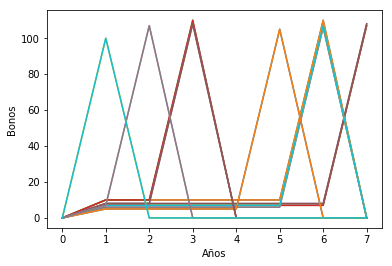

In [13]:
lista1 = [0, 10, 10, 10, 10, 10, 110, 0]  
plt.plot(lista1)   
plt.xlabel("Años")  
plt.ylabel("Bonos")  
plt.ioff()   
plt.plot(lista1)
    
lista2 = [0, 7, 7, 7, 7, 7, 7, 107]  
plt.plot(lista2)   
plt.ioff()  
plt.plot(lista2)  

lista3 = [0, 8, 8, 8, 8, 8, 8, 108]  
plt.plot(lista3)  
plt.ioff()   
plt.plot(lista3)  

lista4 = [0, 6, 6, 6, 6, 6, 106, 0]   
plt.plot(lista4) 
plt.ioff()   
plt.plot(lista4)  

lista5 = [0, 7, 7, 7, 7, 7, 107, 0]  
plt.plot(lista5) 
plt.ioff()   
plt.plot(lista5)  

lista6 = [0, 5, 5, 5, 5, 105, 0, 0]  
plt.plot(lista6)
plt.ioff()  
plt.plot(lista6) 

lista7 = [0, 10, 10, 110, 0, 0, 0, 0]
plt.plot(lista7)
plt.ioff()  
plt.plot(lista7)

lista8 = [0, 8, 8, 108, 0, 0, 0, 0]   
plt.plot(lista8)
plt.ioff()  
plt.plot(lista8) 

lista9 = [0, 7, 107, 0, 0, 0, 0, ]  
plt.plot(lista9)
plt.ioff()   
plt.plot(lista9) 

lista10 = [0, 100, 0, 0, 0, 0, 0, 0]
plt.plot(lista10)
plt.ioff()   
plt.plot(lista10)

## Conclusión

El objetivo principal del proyecto fue realizar una función que nos permita saber en donde invertir de forma inteligente nuestro dinero para poder obtener los mejores momentos para invertir en los bonos. Es a un plazo de 6 años, queríamos saber cuanto dinero depositar en cada uno de los bonos, después del análisis realizado obtuvimos mediante representación matricial los valores correspondientes y con esto nos damos cuenta que tendríamos que invertir: 

+ 13.08 en el bono 2

+ 7.62 en el bono 4

+ 7.89 en el bono 8

**Referencias:**

+ Anónimo. (S/F). Python Pandas DataFrame. 30 septiembre 2019, de Tutorials Point Sitio web: https://www.tutorialspoint.com/python_pandas/python_pandas_dataframe.htm
+ Club de Gestión de Riesgos de España. (s.f.). Gestión de Activos y Pasivos. Recuperado 3 octubre, 2019, de https://www.clubgestionriesgos.org/secciones-informacion-riesgos/gestion-de-activos-y-pasivos/